# Modelos: Deep Factorization Machine (DeepFM)

In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
BASE_PATH = '../..'
LIB_PATH  = f'{BASE_PATH}/lib'

In [3]:
import sys
sys.path.append(LIB_PATH)

import pandas as pd
from bunch import Bunch

import torch
import pytorch_common
import pytorch_common.util as pu

import model as ml
import service as srv

import util as ut

from sklearn.model_selection import train_test_split

2024-01-21 17:03:17.943448: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-21 17:03:18.339080: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-01-21 17:03:18.741717: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-21 17:03:18.752567: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GP

<Figure size 640x480 with 0 Axes>

## Setup

In [4]:
pu.LoggerBuilder().on_console().build()

<RootLogger root (INFO)>

In [5]:
import pytorch_common
pytorch_common.__version__

'0.3.8'

In [6]:
torch.__version__

'2.1.2+cu118'

In [7]:
pu.set_device_name('gpu')

pu.get_device(), torch.cuda.is_available()

(device(type='cuda', index=0), True)

In [8]:
ut.set_seed(42)

## Carga de dataset

In [9]:
dataset  = pd.read_json("/var/tmp/rec-sys-client/fetch_interactions.json")
dev_set, test_set = train_test_split(dataset, test_size=0.2, shuffle=True)

In [10]:
len(dataset.user_seq.unique()), len(dataset.item_seq.unique())

(607, 396)

In [11]:
model_loader = model_loader = srv.DeepFMLoader(
    weights_path          = f'{BASE_PATH}/weights',
    metrics_path          = f'{BASE_PATH}/metrics/deep-gmf',
    tmp_path              = f'{BASE_PATH}/tmp',
    user_seq_col          = 'user_seq',
    item_seq_col          = 'item_seq',
    update_period_in_min  = 1,
)

service = srv.ModulePredictionService(model_loader)

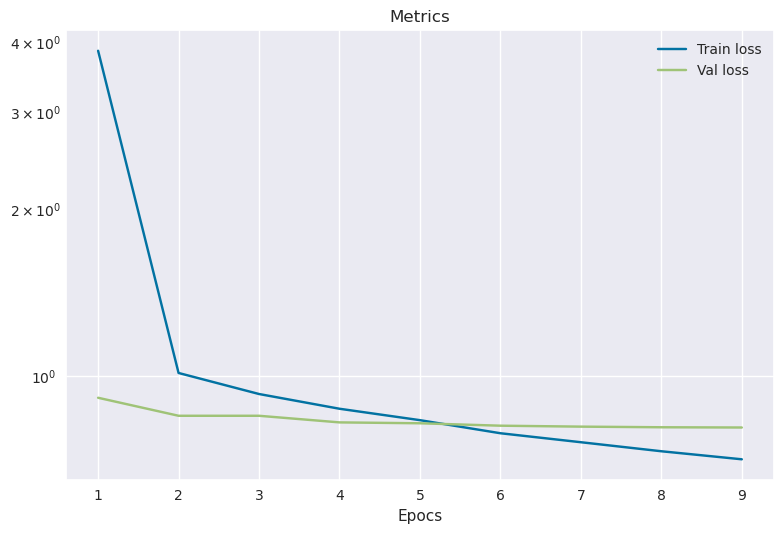

2024-01-21 17:04:11,839 - INFO - {'time': '0:00:02.28', 'epoch': 10, 'train_loss': 0.6864375314183794, 'val_loss': 0.8023019433021545, 'lr': 0.001}
2024-01-21 17:04:11,840 - INFO - Save best model: ../../weights/2024-01-21_17-04-11--deep_fm--epoch_10--val_loss_0.8023019433021545.pt


Processing:   0%|          | 0/250 [00:00<?, ?it/s]

Ordered by mAP@5(4,5):


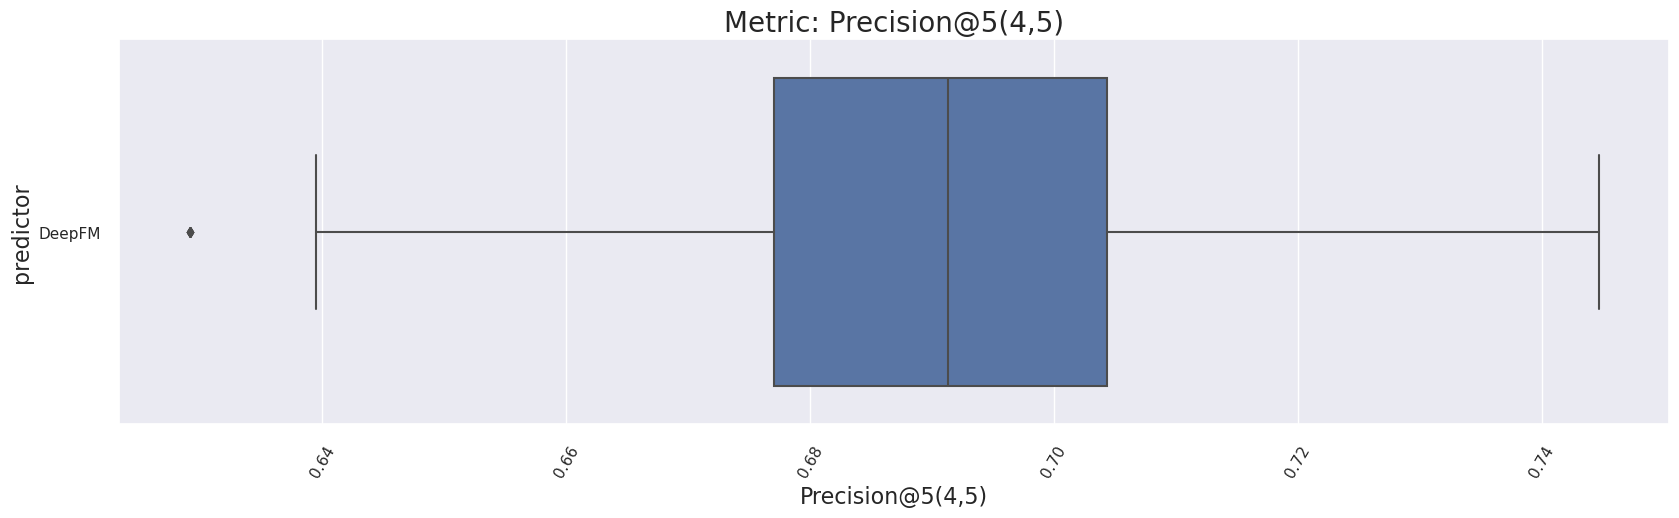

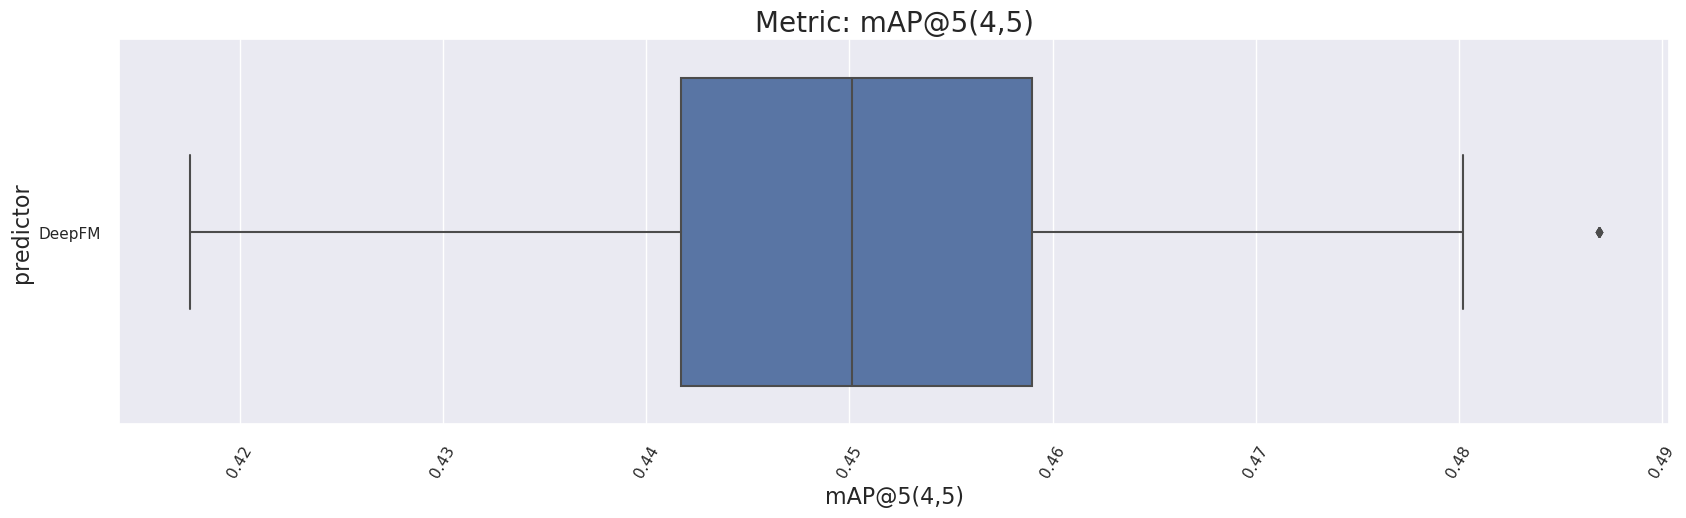

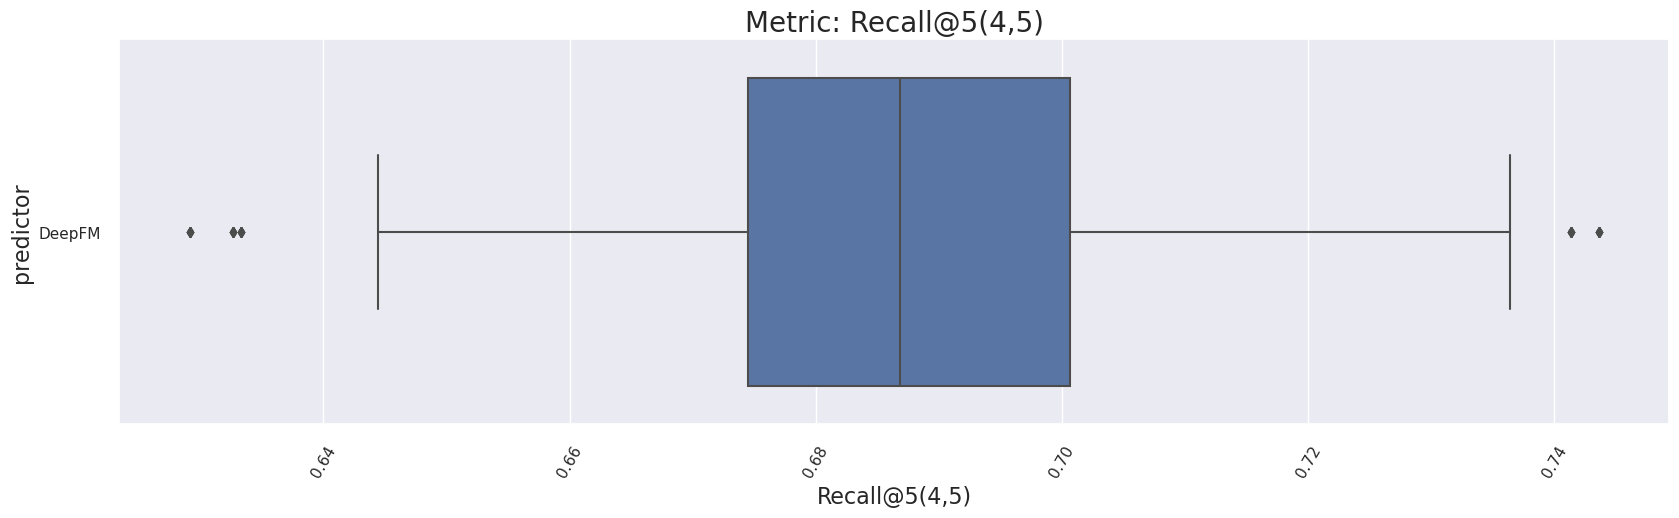

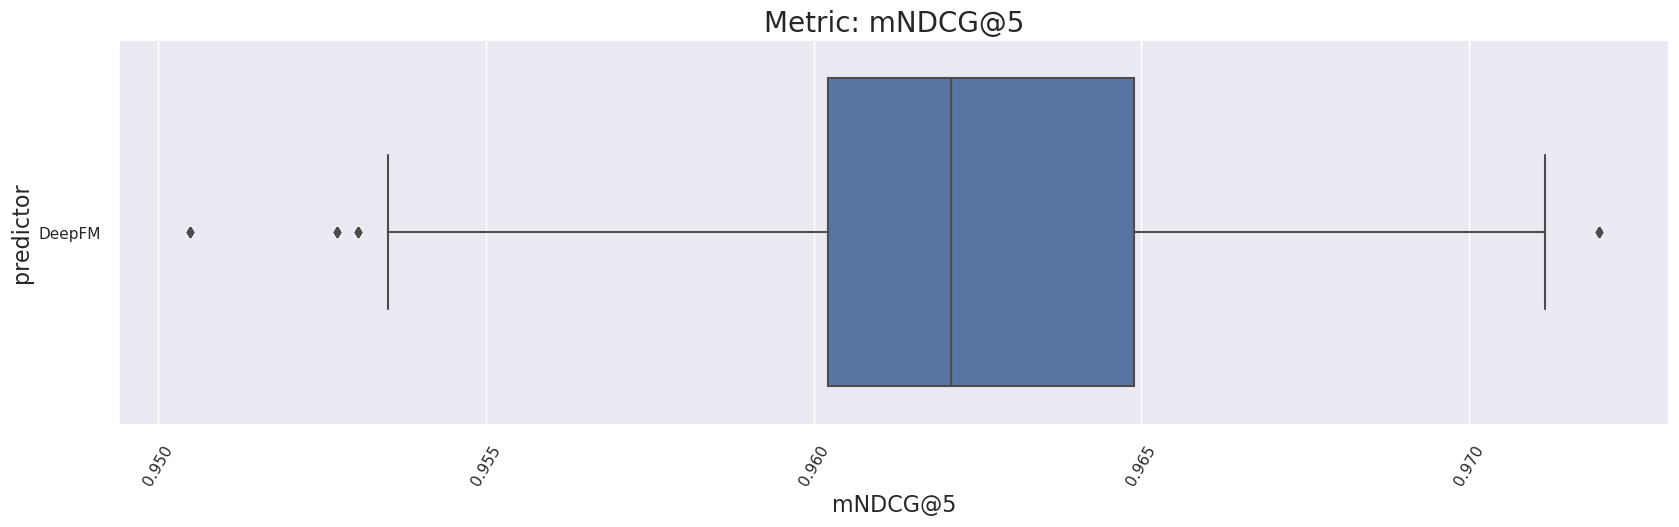

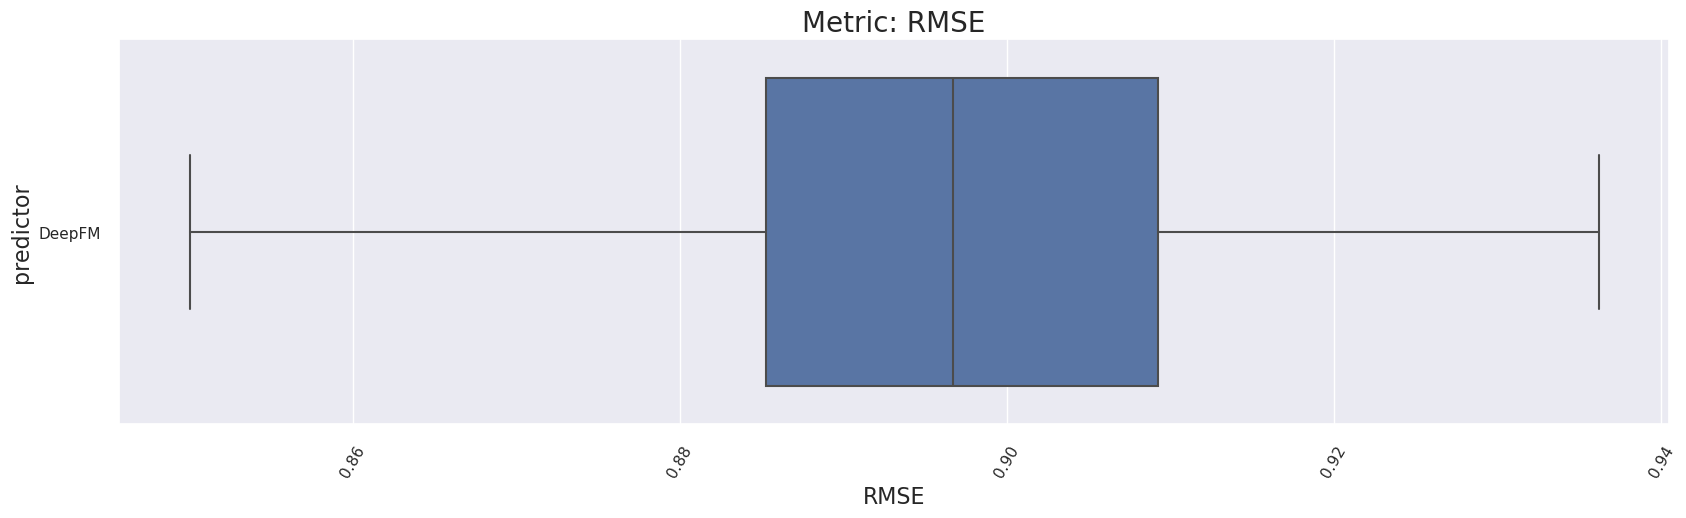

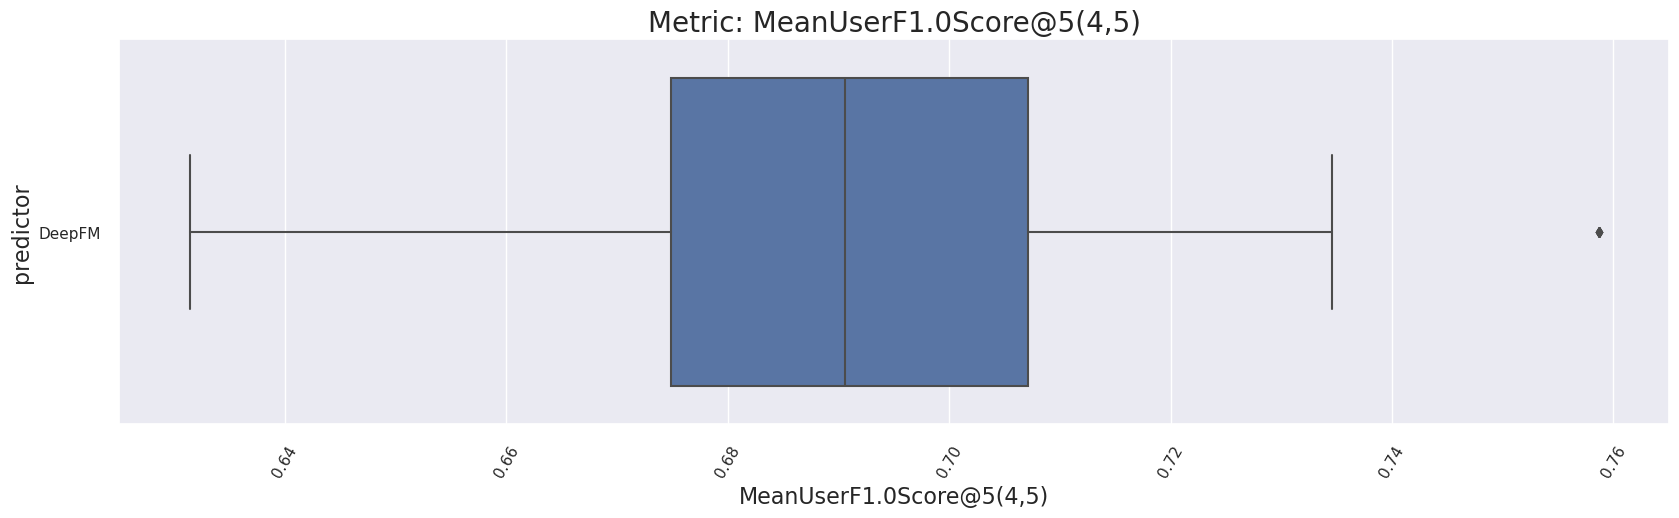

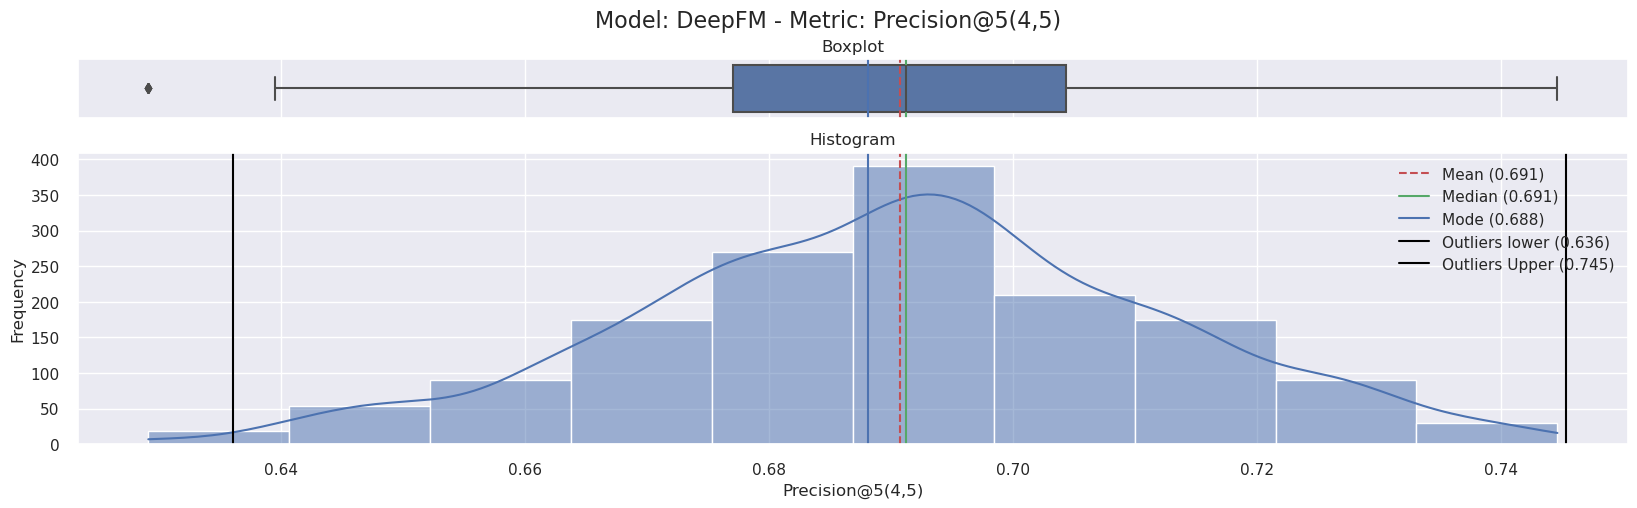

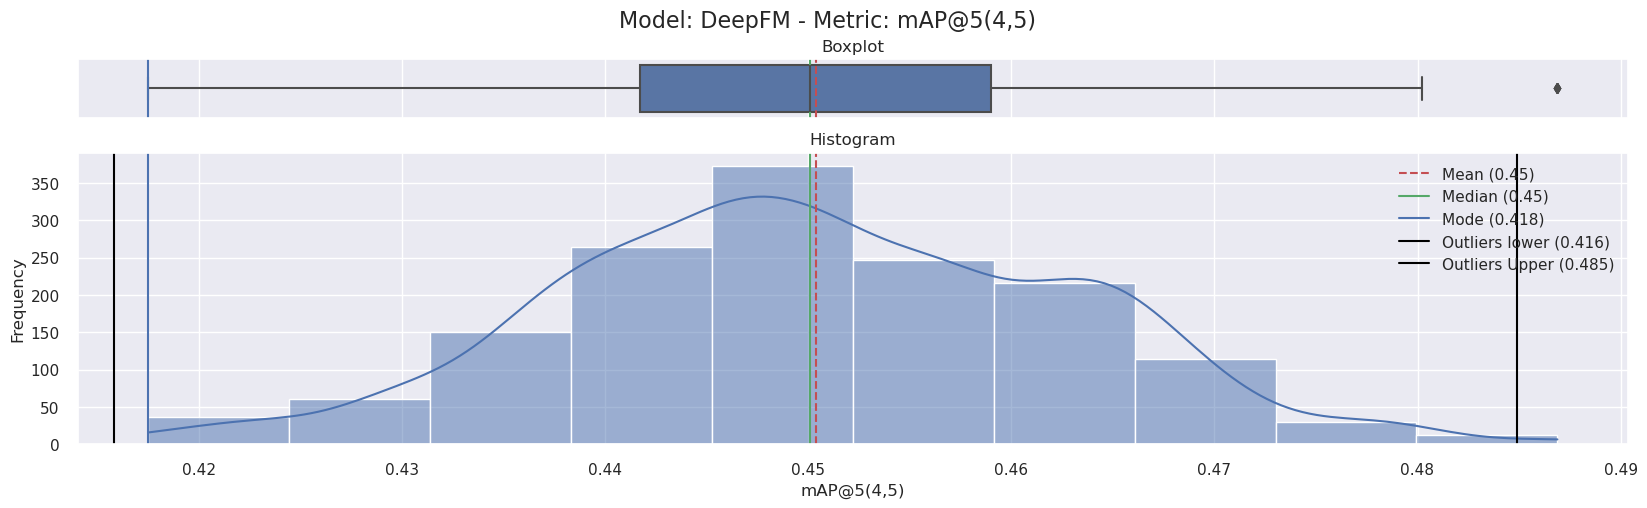

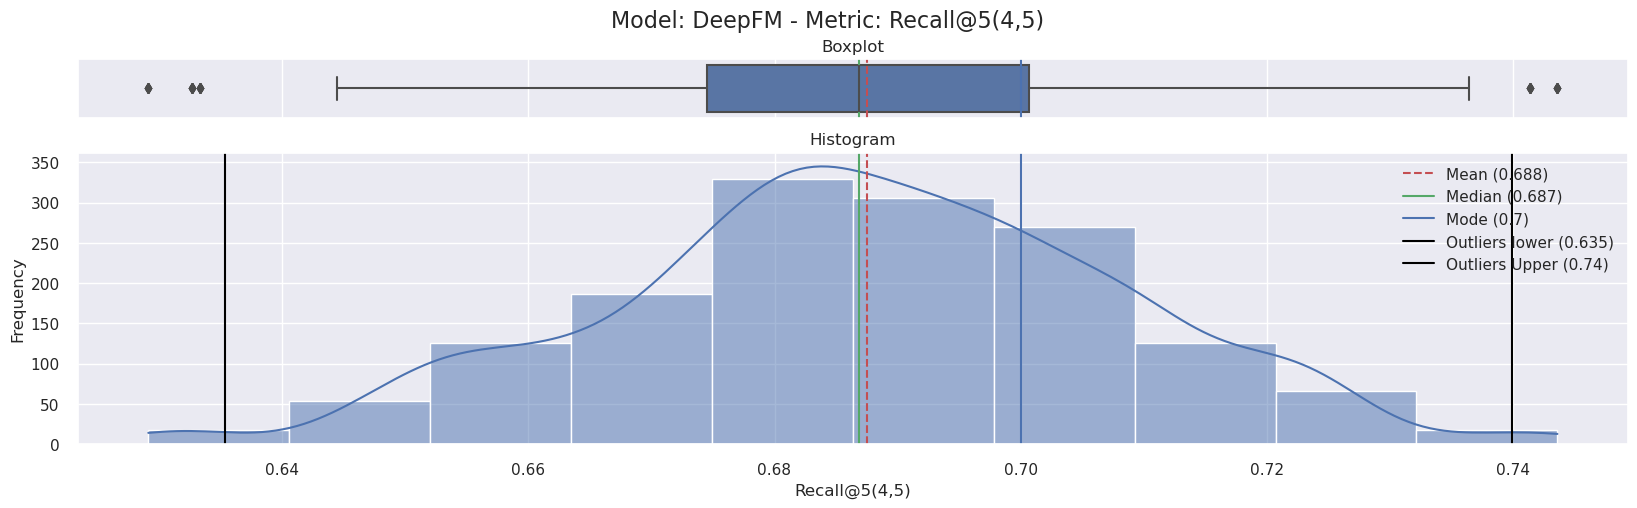

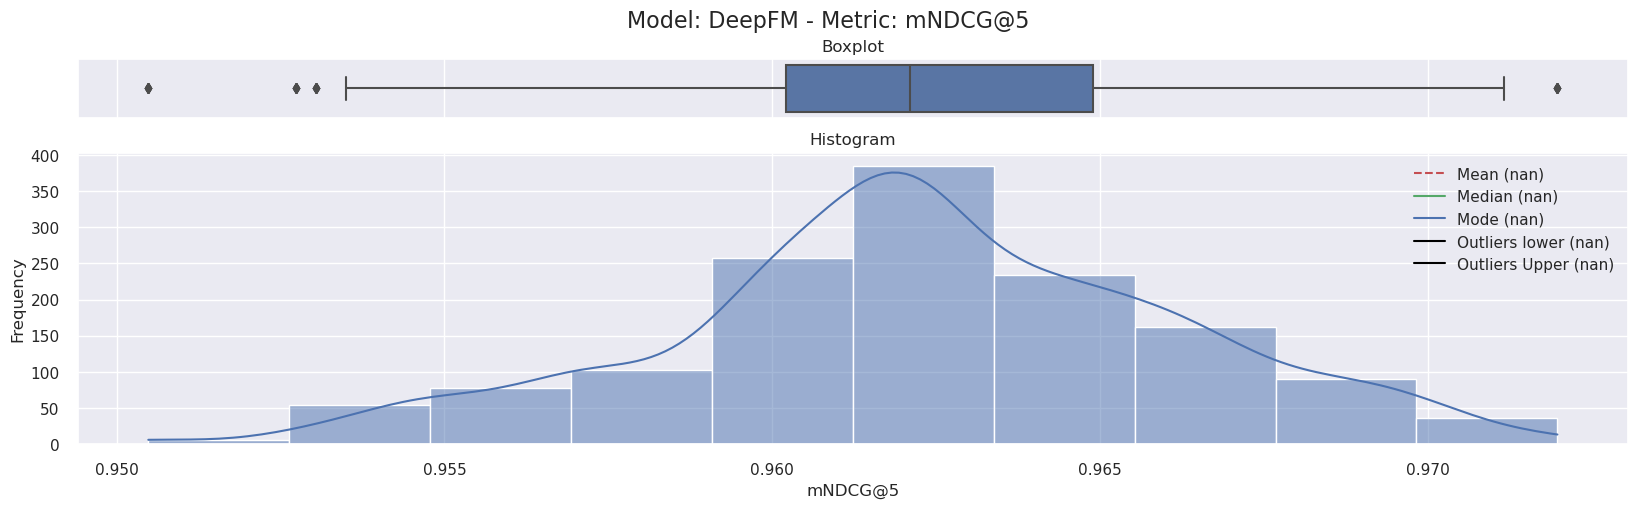

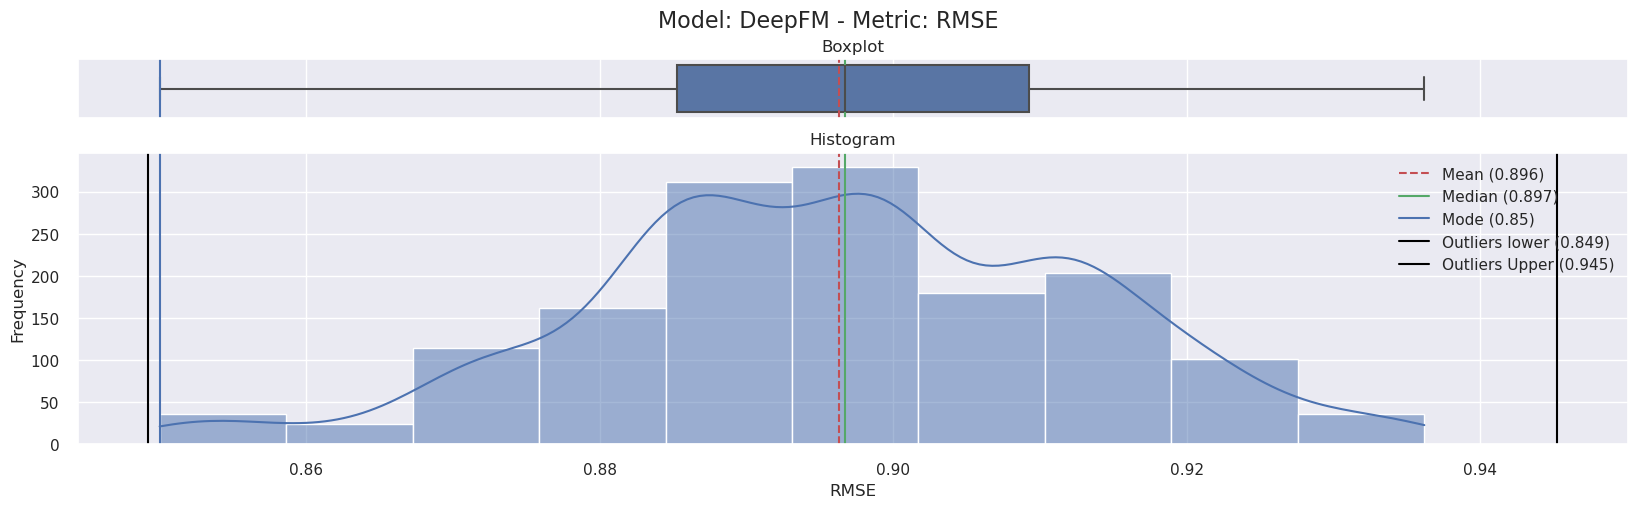

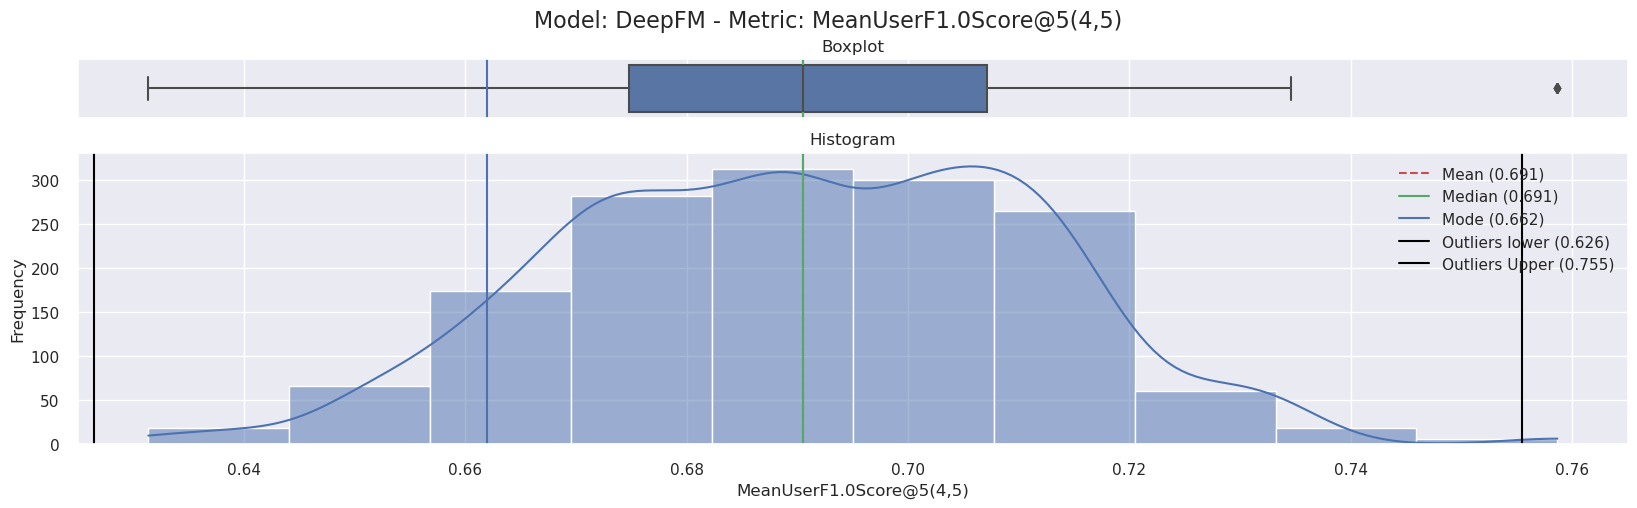

In [12]:
dev_set  = pd.read_json("/var/tmp/rec-sys-client/fetch_interactions.json")


model, params = model_loader.load(dev_set)

In [39]:
len(dataset.user_seq.unique()), len(dataset.item_seq.unique())


(607, 396)

In [60]:
model.embedding.feat_emb_offset

array([  0., 607.])

In [61]:
model.embedding.feature_indexes

[0, 1]

In [58]:
model.embedding.embeddings_by_feature_index(1)

2024-01-21 17:56:02,171 - INFO - Get feature 1 embeddings [395, 50]. Detail: Embeddings from 607 to 1002 from weights [1003, 50]


tensor([[ 0.0597,  0.0937,  0.0013,  ..., -0.0531,  0.0714, -0.0652],
        [-0.0141, -0.0380,  0.1331,  ...,  0.0403, -0.0822,  0.0499],
        [-0.1281, -0.0023, -0.0299,  ..., -0.0079, -0.0164, -0.0399],
        ...,
        [ 0.0641, -0.0054,  0.0499,  ...,  0.0406, -0.0181,  0.0375],
        [-0.0671, -0.0018, -0.0076,  ...,  0.1044,  0.1226, -0.0461],
        [-0.1114,  0.0430,  0.1079,  ..., -0.0358,  0.0898, -0.0092]],
       device='cuda:0')

In [64]:
[emb.shape for emb in model.embedding.feature_embeddings]

2024-01-21 18:06:41,657 - INFO - Get feature 0 embeddings [606, 50]. Detail: Embeddings from 0 to 606 from weights [1003, 50]
2024-01-21 18:06:41,658 - INFO - Get feature 1 embeddings [395, 50]. Detail: Embeddings from 607 to 1002 from weights [1003, 50]


[torch.Size([606, 50]), torch.Size([395, 50])]

In [15]:
test_set = service.predict(dev_set, test_set)

2024-01-21 17:12:37,415 - INFO - 1 minutes wait time expired!.
2024-01-21 17:12:37,416 - INFO - Not found users count changes.
2024-01-21 17:12:37,417 - INFO - Not found items count changes.
2024-01-21 17:12:37,417 - INFO - Not found interactions count changes.


In [16]:
test_set

,user_id,item_id,rating,suitable_to_train,created_at,user_seq,item_seq,rating_prediction
6415,109,16,4.0,True,2023-09-12 00:10:24.775,106,115,3.872722
3725,64,4878,4.0,True,2023-09-12 00:10:24.775,61,279,3.654703
18859,321,589,3.0,True,2023-09-12 00:10:24.775,317,107,3.561437
16381,288,253,4.0,True,2023-09-12 00:10:24.775,284,100,3.373725
6933,119,4306,4.0,True,2023-09-12 00:10:24.775,116,170,3.688956
...,...,...,...,...,...,...,...,...
9739,177,153,3.0,True,2023-09-12 00:10:24.775,173,99,2.716259
32860,570,150,4.0,True,2023-09-12 00:10:24.775,565,98,3.464120
22003,376,1200,3.5,True,2023-09-12 00:10:24.775,372,244,3.936510
5679,96,1304,4.0,True,2023-09-12 00:10:24.775,93,51,3.969063
